Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [7]:
!pip install pymystem3

In [8]:
import re

In [9]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [13]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [14]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [15]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [16]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [17]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [18]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [19]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [20]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [21]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [22]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [23]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [24]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [25]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [26]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [27]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [28]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [29]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [30]:
from nltk.tokenize import word_tokenize
import nltk
import string

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [31]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [32]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [33]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [38]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [39]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [40]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [41]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [42]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [43]:
from nltk import FreqDist

In [45]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [47]:
stop_words = set(stopwords.words("english"))

In [48]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

<Axes: xlabel='Samples', ylabel='Counts'>

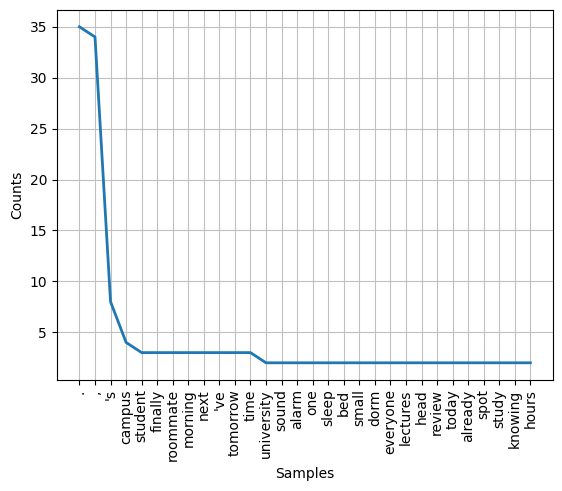

In [49]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [50]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

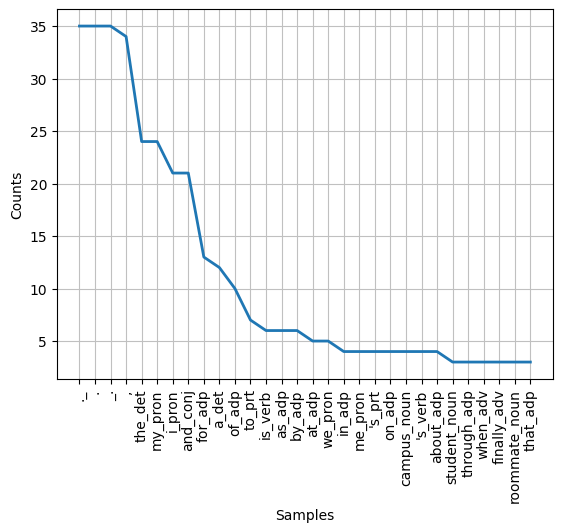

In [51]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?
    Ответ: немного отличаются, особенно когда применяется разметка на части речи   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [52]:
!pip install nltk spacy pymorphy2 natasha
!python -m spacy download ru_core_news_sm

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))
nlp_ru = spacy.load("ru_core_news_sm")
english_stopwords = set(stopwords.words('english'))
nlp_en = spacy.load("en_core_web_sm")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=be0f0fd1932ae2a4b79ba01f88899922dc1b995e3c6ea70d91b38601f1de8cb1
  Stored in directory: /root/.cache/pip/wheels/1a/bf/a1/4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 70.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload d

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
english_text = "english_text.txt"
russian_text = "russian_text.txt"

# Reading English text
with open(english_text, 'r', encoding='utf-8') as file:
    english_text = file.read()
print(f"Файл успешно прочитан. Длина текста: {len(english_text)} символов")

# Reading Russian text
with open(russian_text, 'r', encoding='utf-8') as file:
    russian_text = file.read()
print(f"Файл успешно прочитан. Длина текста: {len(russian_text)} символов")

def clean_text(original_text):
    punctuation = string.punctuation
    translator = str.maketrans('', '', punctuation)
    original_text = original_text.translate(translator)
    text = original_text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join(text.split())
    return text

# Tokenize (Первый способ)
russian_text = clean_text(russian_text)
rus_text_tokens_nltk = word_tokenize(russian_text)
rus_filtered_tokens = [token for token in rus_text_tokens_nltk if token not in russian_stopwords]
print(rus_filtered_tokens)

eng_text_tokens_nltk = word_tokenize(english_text)
english_text = clean_text(english_text)
eng_text_tokens_nltk = word_tokenize(english_text)
eng_filtered_tokens = [token for token in eng_text_tokens_nltk if token not in english_stopwords]
print(eng_filtered_tokens)



Файл успешно прочитан. Длина текста: 4209 символов
Файл успешно прочитан. Длина текста: 11797 символов
['инструменты', 'повышения', 'производительности', 'труда', 'опробованные', 'промышленности', 'внедряются', 'социальную', 'сферу', 'оптимизация', 'процессов', 'должна', 'улучшить', 'доступность', 'качество', 'услуг', 'увеличения', 'нагрузки', 'персонал', 'использование', 'потенциала', 'повышения', 'производительности', 'труда', 'сделает', 'ограничения', 'трудовых', 'ресурсах', 'ближайшие', 'годы', 'некритичными', 'отмечают', 'аналитики', 'института', 'народнохозяйственного', 'прогнозирования', 'ран', 'правительство', 'ставит', 'целью', 'увеличение', 'производительности', 'труда', 'году', 'пятая', 'часть', 'показателя', 'должна', 'достигнута', 'помощью', 'мер', 'поддержки', 'предусмотренных', 'национальным', 'проектом', 'эффективная', 'конкурентная', 'экономика', 'входящим', 'федеральным', 'проектом', 'производительность', 'труда', 'рассказал', 'министр', 'экономического', 'развития', 

<Axes: xlabel='Samples', ylabel='Counts'>

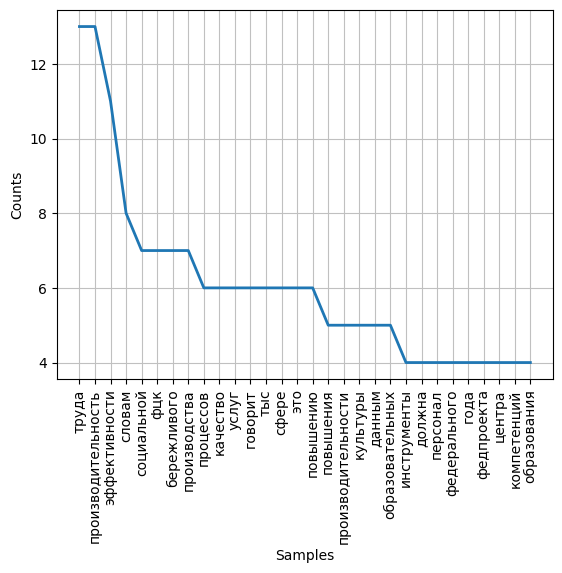

In [80]:
frequency_distribution_1 = FreqDist(rus_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

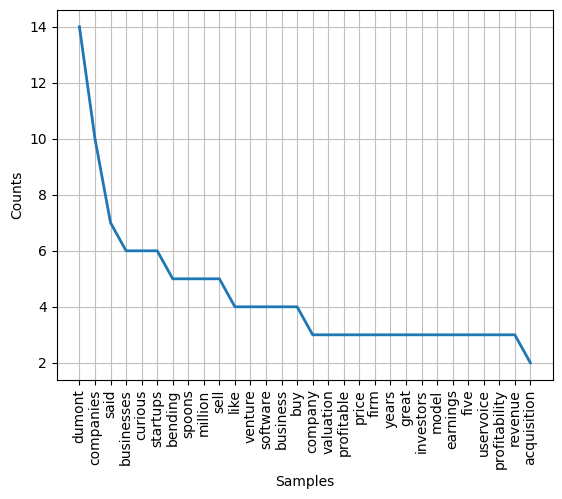

In [81]:
frequency_distribution_2 = FreqDist(eng_filtered_tokens)
frequency_distribution_2.plot(30, cumulative=False)

In [56]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('universal_tagset')


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [57]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [77]:
tagged_rus = nltk.pos_tag(rus_filtered_tokens)
tagged_eng = nltk.pos_tag(eng_filtered_tokens)

In [78]:
# Разметить на чати речи. Второй способ
rus_list_of_tagged = []
for elem in tagged_rus:
    tag_tog = '_'.join(elem)
    rus_list_of_tagged.append(tag_tog)
print(rus_list_of_tagged)

['инструменты_JJ', 'повышения_NNP', 'производительности_NNP', 'труда_NNP', 'опробованные_NNP', 'промышленности_NNP', 'внедряются_NNP', 'социальную_NNP', 'сферу_NNP', 'оптимизация_NNP', 'процессов_NNP', 'должна_NNP', 'улучшить_NNP', 'доступность_NNP', 'качество_NNP', 'услуг_NNP', 'увеличения_NNP', 'нагрузки_NNP', 'персонал_NNP', 'использование_NNP', 'потенциала_NNP', 'повышения_NNP', 'производительности_NNP', 'труда_NNP', 'сделает_NNP', 'ограничения_NNP', 'трудовых_NNP', 'ресурсах_NNP', 'ближайшие_NNP', 'годы_NNP', 'некритичными_NNP', 'отмечают_NNP', 'аналитики_NNP', 'института_NNP', 'народнохозяйственного_NNP', 'прогнозирования_NNP', 'ран_NNP', 'правительство_NNP', 'ставит_NNP', 'целью_NNP', 'увеличение_NNP', 'производительности_NNP', 'труда_NNP', 'году_NNP', 'пятая_NNP', 'часть_NNP', 'показателя_NNP', 'должна_NNP', 'достигнута_NNP', 'помощью_NNP', 'мер_NNP', 'поддержки_NNP', 'предусмотренных_NNP', 'национальным_NNP', 'проектом_NNP', 'эффективная_NNP', 'конкурентная_NNP', 'экономика_NN

<Axes: xlabel='Samples', ylabel='Counts'>

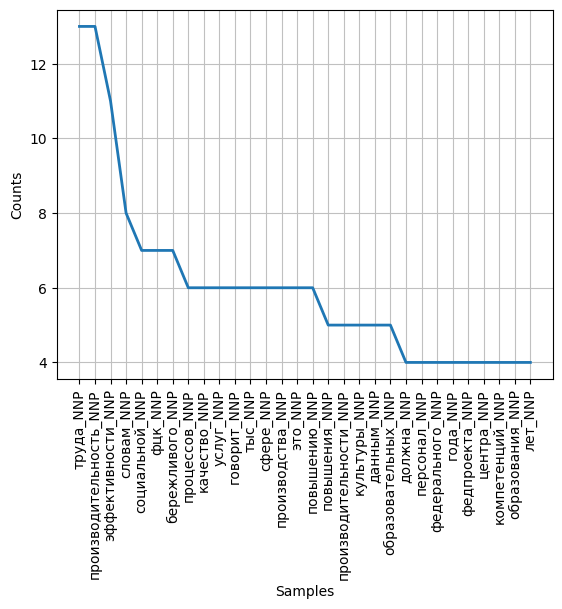

In [79]:
frequency_distribution_3 = FreqDist(rus_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

In [83]:
eng_list_of_tagged = []
for elem in tagged_eng:
    tag_tog = '_'.join(elem)
    eng_list_of_tagged.append(tag_tog)
print(eng_list_of_tagged)

['italian_JJ', 'company_NN', 'bending_VBG', 'spoons_NNS', 'flew_RBR', 'largely_RB', 'radar_VB', 'last_JJ', 'month_NN', 'span_VBD', 'hours_NNS', 'company_NN', 'announced_VBD', 'acquisition_NN', 'aol_RB', 'massive_JJ', 'million_CD', 'raise_NN', 'quadrupling_VBG', 'valuation_NN', 'billion_CD', 'billion_CD', 'set_VBD', 'early_JJ', 'bending_NN', 'spoons_NNS', 'grown_VBP', 'rapidly_RB', 'acquiring_VBG', 'stagnating_VBG', 'tech_JJ', 'brands_NNS', 'like_IN', 'evernote_VBP', 'meetup_JJ', 'vimeo_NN', 'turning_VBG', 'profitable_JJ', 'aggressive_JJ', 'costcutting_NN', 'price_NN', 'increases_NNS', 'company_NN', 'approach_NN', 'similar_JJ', 'private_JJ', 'equity_NN', 'one_CD', 'key_NN', 'difference_NN', 'bending_VBG', 'spoons_NNS', 'plans_NNS', 'sell_VBP', 'businesses_NNS', 'andrew_VBD', 'dumont_JJ', 'founder_NN', 'ceo_NN', 'curious_JJ', 'firm_NN', 'also_RB', 'acquires_VBZ', 'revitalizes_VBZ', 'calls_NNS', 'venture_NN', 'zombies_NNS', 'convinced_VBD', 'hold_NN', 'forever_RB', 'strategy_NN', 'become_

<Axes: xlabel='Samples', ylabel='Counts'>

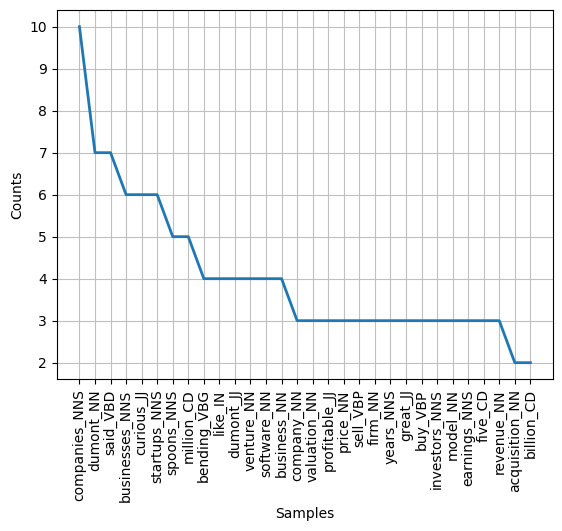

In [84]:
frequency_distribution_3 = FreqDist(eng_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

In [85]:
# Лемма и стемм. Третий способ
joined_tokens = ' '.join(rus_filtered_tokens)
doc = nlp_ru(joined_tokens)
lemmas = [token.lemma_ for token in doc if token.is_alpha]

stemmer = SnowballStemmer("russian")
words = re.findall(r'\b\w+\b', joined_tokens)
stems = [stemmer.stem(word) for word in words]
print(stems)
print(lemmas)

['инструмент', 'повышен', 'производительн', 'труд', 'опробова', 'промышлен', 'внедря', 'социальн', 'сфер', 'оптимизац', 'процесс', 'должн', 'улучш', 'доступн', 'качеств', 'услуг', 'увеличен', 'нагрузк', 'персона', 'использован', 'потенциа', 'повышен', 'производительн', 'труд', 'сдела', 'ограничен', 'трудов', 'ресурс', 'ближайш', 'год', 'некритичн', 'отмеча', 'аналитик', 'институт', 'народнохозяйствен', 'прогнозирован', 'ран', 'правительств', 'став', 'цел', 'увеличен', 'производительн', 'труд', 'год', 'пят', 'част', 'показател', 'должн', 'достигнут', 'помощ', 'мер', 'поддержк', 'предусмотрен', 'национальн', 'проект', 'эффективн', 'конкурентн', 'экономик', 'входя', 'федеральн', 'проект', 'производительн', 'труд', 'рассказа', 'министр', 'экономическ', 'развит', 'макс', 'решетник', 'пленарн', 'сесс', 'vii', 'федеральн', 'форум', 'производительн', 'слов', 'производительн', 'должн', 'стат', 'управленческ', 'норм', 'уровн', 'завод', 'ведомств', 'школ', 'регион', 'год', 'реализац', 'федпроект'

<Axes: xlabel='Samples', ylabel='Counts'>

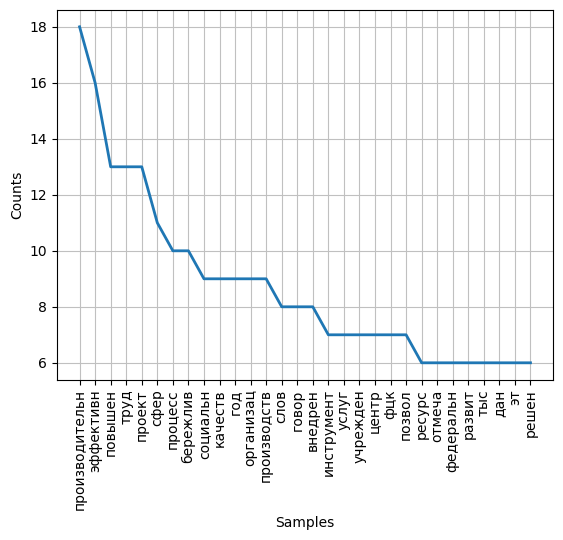

In [89]:
frequency_distribution_4 = FreqDist(stems)
frequency_distribution_4.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

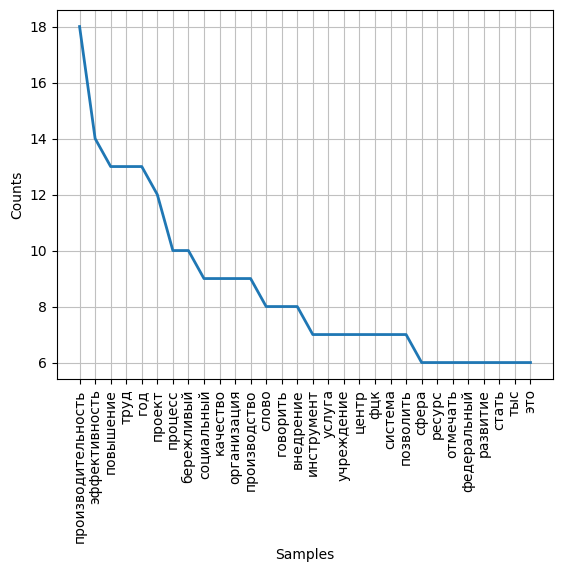

In [90]:
frequency_distribution_5 = FreqDist(lemmas)
frequency_distribution_5.plot(30, cumulative=False)

In [92]:
joined_tokens = ' '.join(eng_filtered_tokens)
doc = nlp_en(joined_tokens)
lemmas = [token.lemma_ for token in doc if token.is_alpha]

stemmer = SnowballStemmer("english")
words = re.findall(r'\b\w+\b', joined_tokens)
stems = [stemmer.stem(word) for word in words]
print(stems)
print(lemmas)

['italian', 'compani', 'bend', 'spoon', 'flew', 'larg', 'radar', 'last', 'month', 'span', 'hour', 'compani', 'announc', 'acquisit', 'aol', 'massiv', 'million', 'rais', 'quadrupl', 'valuat', 'billion', 'billion', 'set', 'earli', 'bend', 'spoon', 'grown', 'rapid', 'acquir', 'stagnat', 'tech', 'brand', 'like', 'evernot', 'meetup', 'vimeo', 'turn', 'profit', 'aggress', 'costcut', 'price', 'increas', 'compani', 'approach', 'similar', 'privat', 'equiti', 'one', 'key', 'differ', 'bend', 'spoon', 'plan', 'sell', 'busi', 'andrew', 'dumont', 'founder', 'ceo', 'curious', 'firm', 'also', 'acquir', 'revit', 'call', 'ventur', 'zombi', 'convinc', 'hold', 'forev', 'strategi', 'becom', 'increas', 'promin', 'come', 'year', 'ainat', 'startup', 'make', 'older', 'vcback', 'softwar', 'busi', 'less', 'relev', 'belief', 'ventur', 'power', 'law', 'compani', 'fail', 'produc', 'mani', 'great', 'busi', 'even', 'unicorn', 'dumont', 'told', 'techcrunch', 'dumont', 'defin', 'great', 'busi', 'one', 'purchas', 'low', 

<Axes: xlabel='Samples', ylabel='Counts'>

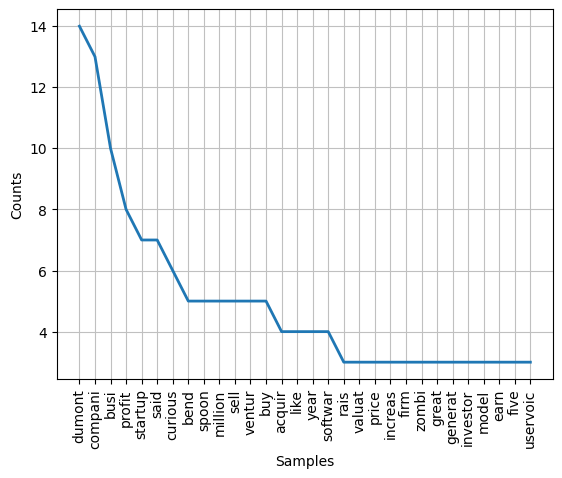

In [93]:
frequency_distribution_6 = FreqDist(stems)
frequency_distribution_6.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

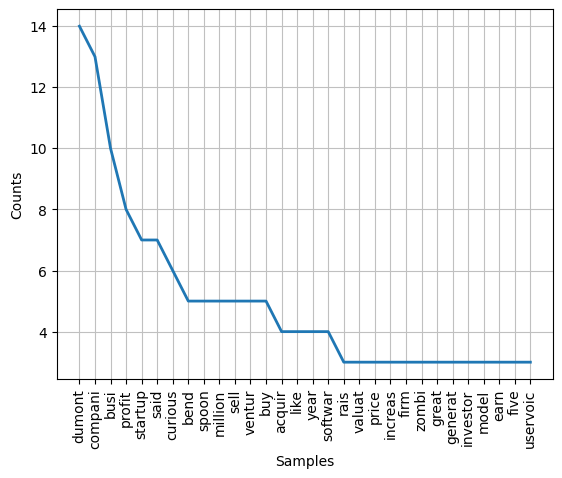

In [94]:
frequency_distribution_7 = FreqDist(stems)
frequency_distribution_7.plot(30, cumulative=False)